In [1]:
!pip install -U vnstock3
!pip install xlsxwriter

In [2]:
import pandas as pd
from vnstock3 import Vnstock
from datetime import datetime
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [3]:
# Initialize the Vnstock oject
stock = Vnstock().stock(symbol='ACB', source='TCBS')
stock.listing.all_symbols()

,ticker,organ_name
0,A32,Công ty Cổ phần 32
1,AAA,Công ty Cổ phần Nhựa An Phát Xanh
2,AAM,Công ty Cổ Phần Thủy Sản MeKong
3,AAS,Công ty Cổ phần Chứng khoán SmartInvest
4,AAT,Công ty Cổ phần Tập đoàn Tiên Sơn Thanh Hóa
...,...,...
1593,XPH,Công ty Cổ phần Xà phòng Hà Nội
1594,YBC,Công ty Cổ phần Xi măng và Khoáng sản Yên Bái
1595,YBM,Công ty Cổ phần Khoáng sản Công nghiệp Yên Bái
1596,YEG,Công ty Cổ phần Tập đoàn Yeah1


In [4]:
stock.listing.symbols_by_exchange()

,symbol,id,type,exchange,en_organ_name,en_organ_short_name,organ_short_name,organ_name
0,YTC,8425620,STOCK,UPCOM,Ho Chi Minh City Medical Import Export Joint S...,YTECO,XNK Y tế TP.HCM,Công ty Cổ phần Xuất nhập khẩu Y tế Thành phố ...
1,YEG,8424579,STOCK,HSX,Yeah1 Group Corporation,Yeah1 Group,Tập đoàn Yeah1,Công ty Cổ phần Tập đoàn Yeah1
2,YBM,8424470,STOCK,HSX,Yen Bai Industry Mineral Joint Stock Company,Yen Bai Industry Mineral,Khoáng sản CN Yên Bái,Công ty Cổ phần Khoáng sản Công nghiệp Yên Bái
3,YBC,8425710,STOCK,UPCOM,YenBai Cement and Minerals Joint Stock Company,YenBai Cement and Minerals,Xi măng và Khoáng sản Yên Bái,Công ty Cổ phần Xi măng và Khoáng sản Yên Bái
4,XPH,8425864,STOCK,UPCOM,Hanoi Soap Joint Stock Company,Hanoi Soap,Xà phòng Hà Nội,Công ty Cổ phần Xà phòng Hà Nội
...,...,...,...,...,...,...,...,...
2544,AAS,8425599,STOCK,UPCOM,Smart Invest Securities Joint Stock Company,SmartInvest Securities,Chứng khoán SmartInvest,Công ty Cổ phần Chứng khoán SmartInvest
2545,AAM,8424957,STOCK,HSX,Mekong Fisheries Joint Stock Company,Mekong Fisheries,Thủy sản Mekong,Công ty Cổ Phần Thủy Sản MeKong
2546,AAH,13216673,STOCK,UPCOM,Hop Nhat Joint Stock Company,Hop Nhat Coal,Than Hợp Nhất,Công ty Cổ phần Hợp Nhất
2547,AAA,8424464,STOCK,HSX,An Phat Bioplastics Joint Stock Company,An Phat Bioplastics,An Phát Bioplastics,Công ty Cổ phần Nhựa An Phát Xanh


In [5]:
stock.listing.symbols_by_industries()

,symbol,organ_name,en_organ_name,icb_name3,en_icb_name3,icb_name2,en_icb_name2,icb_name4,en_icb_name4,com_type_code,icb_code1,icb_code2,icb_code3,icb_code4
0,CCC,Công ty Cổ Phần Xây Dựng CDC,CDC Construction Joint Stock Company,Xây dựng và Vật liệu,Construction & Materials,Xây dựng và Vật liệu,Construction & Materials,Xây dựng,Heavy Construction,CT,2000,2300,2350,2357
1,HIO,Công ty Cổ Phần Helio Energy,Helio Energy Joint Stock Company,Sản xuất & Phân phối Điện,Electricity,"Điện, nước & xăng dầu khí đốt",Utilities,Sản xuất & Phân phối Điện,Conventional Electricity,CT,7000,7500,7530,7535
2,TSA,Công ty Cổ Phần Đầu Tư Và Xây Lắp Trường Sơn,Truong Son Investment And Construction Joint S...,Xây dựng và Vật liệu,Construction & Materials,Xây dựng và Vật liệu,Construction & Materials,Xây dựng,Heavy Construction,CT,2000,2300,2350,2357
3,CST,Công ty Cổ phần Than Cao Sơn - TKV,Cao Son Coal Joint Stock Company,Khai khoáng,Mining,Tài nguyên Cơ bản,Basic Resources,Khai thác Than,Coal,CT,1000,1700,1770,1771
4,SGI,Công ty Cổ phần Đầu tư phát triển Sài Gòn 3 Group,Sai Gon 3 Group Investment Development Joint S...,Hàng cá nhân,Personal Goods,Hàng cá nhân & Gia dụng,Personal & Household Goods,Hàng May mặc,Clothing & Accessories,CT,3000,3700,3760,3763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,VIB,Ngân hàng Thương mại Cổ phần Quốc tế Việt Nam,Viet Nam International Commercial Joint Stock ...,Ngân hàng,Banks,Ngân hàng,Banks,Ngân hàng,Banks,NH,8301,8300,8350,8355
1585,VIC,Tập đoàn Vingroup - Công ty CP,VinGroup Joint Stock Company,Bất động sản,Real Estate Investment & Services,Bất động sản,Real Estate,Bất động sản,Real Estate Holding & Development,CT,8000,8600,8630,8633
1586,PVO,Công ty Cổ phần Dầu nhờn PV Oil,PV Oil Lube Joint Stock Company,Hóa chất,Chemicals,Hóa chất,Chemicals,"Sản phẩm hóa dầu, Nông dược & Hóa chất khác",Specialty Chemicals,CT,1000,1300,1350,1357
1587,DVM,Công ty Cổ phần Dược liệu Việt Nam,Vietnam Medicinal Materials Joint Stock Company,Dược phẩm,Pharmaceuticals & Biotechnology,Y tế,Health Care,Dược phẩm,Pharmaceuticals,CT,4000,4500,4570,4577


In [6]:
stock.listing.symbols_by_group('VN30')

0     ACB
1     BCM
2     BID
3     BVH
4     CTG
5     FPT
6     GAS
7     GVR
8     HDB
9     HPG
10    MBB
11    MSN
12    MWG
13    PLX
14    POW
15    SAB
16    SHB
17    SSB
18    SSI
19    STB
20    TCB
21    TPB
22    VCB
23    VHM
24    VIB
25    VIC
26    VJC
27    VNM
28    VPB
29    VRE
Name: symbol, dtype: object

In [7]:
stock.listing.industries_icb()

,icb_name,en_icb_name,icb_code,level
0,Sản xuất Dầu khí,Oil & Gas Producers,0530,3
1,"Thiết bị, Dịch vụ và Phân phối Dầu khí","Oil Equipment, Services & Distribution",0570,3
2,Hóa chất,Chemicals,1350,3
3,Lâm nghiệp và Giấy,Forestry & Paper,1730,3
4,Kim loại,Industrial Metals & Mining,1750,3
...,...,...,...,...
151,Viễn thông,Telecommunications,6000,1
152,Tiện ích Cộng đồng,Utilities,7000,1
153,Tài chính,Financials,8000,1
154,Ngân hàng,Banks,8301,1


In [8]:
df = stock.quote.history(start='2023-08-15', end = '2024-08-15', interval='1D')
df

,time,open,high,low,close,volume
0,2023-08-15,19.45,19.53,19.19,19.19,6464684
1,2023-08-16,19.19,19.36,19.15,19.24,8402525
2,2023-08-17,19.28,19.32,19.07,19.07,10125955
3,2023-08-18,19.07,19.07,18.40,18.40,20459276
4,2023-08-21,18.35,18.65,18.35,18.48,7981455
...,...,...,...,...,...,...
492,2024-08-09,23.40,23.60,23.30,23.60,3012436
493,2024-08-12,23.60,23.80,23.30,23.80,4203077
494,2024-08-13,23.55,23.80,23.50,23.60,2854856
495,2024-08-14,23.70,23.80,23.55,23.55,3321023


In [9]:
# print(f'Mã chứng khoán: {df.name}')
# print(f'Loại tài sản: {df.category}')

In [10]:
stock.quote.intraday(symbol='ACB', show_log=False)

,time,price,volume,match_type
0,2024-08-20 13:22:48,24050.0,300,Sell
1,2024-08-20 13:22:38,24050.0,100,Sell
2,2024-08-20 13:22:38,24100.0,3000,Buy
3,2024-08-20 13:22:01,24100.0,500,Buy
4,2024-08-20 13:21:28,24100.0,25000,Buy
...,...,...,...,...
95,2024-08-20 13:12:29,24050.0,1700,Sell
96,2024-08-20 13:11:41,24050.0,2000,Sell
97,2024-08-20 13:11:25,24050.0,100,Sell
98,2024-08-20 13:11:22,24100.0,200,Buy


In [18]:
# df.to_excel(r"Downloads/datafinace.xlsx")

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
df = pd.read_excel(r"Downloads/datafinace.xlsx")

In [24]:
df = df.drop(columns=['Unnamed: 0'])
df

,time,open,high,low,close,volume
0,2023-08-15,19.45,19.53,19.19,19.19,6464684
1,2023-08-16,19.19,19.36,19.15,19.24,8402525
2,2023-08-17,19.28,19.32,19.07,19.07,10125955
3,2023-08-18,19.07,19.07,18.40,18.40,20459276
4,2023-08-21,18.35,18.65,18.35,18.48,7981455
...,...,...,...,...,...,...
494,2024-08-09,23.40,23.60,23.30,23.60,3012436
495,2024-08-12,23.60,23.80,23.30,23.80,4203077
496,2024-08-13,23.55,23.80,23.50,23.60,2854856
497,2024-08-14,23.70,23.80,23.55,23.55,3321023


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    499 non-null    datetime64[ns]
 1   open    499 non-null    float64       
 2   high    499 non-null    float64       
 3   low     499 non-null    float64       
 4   close   499 non-null    float64       
 5   volume  499 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 23.5 KB


In [28]:
df.isnull().sum()

time      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [30]:
df.describe()

,time,open,high,low,close,volume
count,499,499.000000,499.000000,499.000000,499.000000,4.990000e+02
mean,2024-02-14 17:53:30.420841728,21.580100,21.764509,21.386633,21.571764,8.666214e+06
min,2023-08-15 00:00:00,17.930000,18.100000,17.600000,17.720000,2.277359e+06
25%,2023-11-14 00:00:00,18.900000,19.110000,18.770000,18.940000,5.148344e+06
50%,2024-02-16 00:00:00,22.510000,22.680000,22.340000,22.470000,7.449978e+06
75%,2024-05-20 12:00:00,23.600000,23.850000,23.440000,23.600000,1.048532e+07
max,2024-08-15 00:00:00,25.100000,25.370000,24.650000,25.100000,3.386711e+07
std,NaN,2.364346,2.378005,2.324124,2.360230,5.274111e+06


In [32]:
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
print(df.isnull().sum())

open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [34]:
print(df[['open','high','low','close','volume']].describe())

             open        high         low       close        volume
count  499.000000  499.000000  499.000000  499.000000  4.990000e+02
mean    21.580100   21.764509   21.386633   21.571764  8.666214e+06
std      2.364346    2.378005    2.324124    2.360230  5.274111e+06
min     17.930000   18.100000   17.600000   17.720000  2.277359e+06
25%     18.900000   19.110000   18.770000   18.940000  5.148344e+06
50%     22.510000   22.680000   22.340000   22.470000  7.449978e+06
75%     23.600000   23.850000   23.440000   23.600000  1.048532e+07
max     25.100000   25.370000   24.650000   25.100000  3.386711e+07


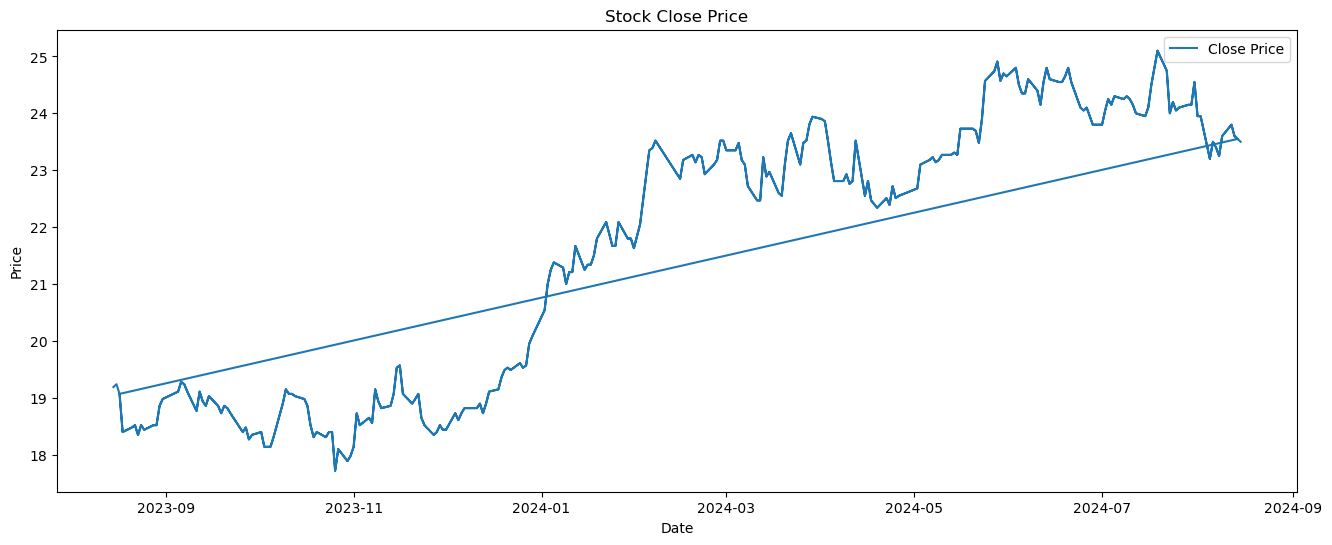

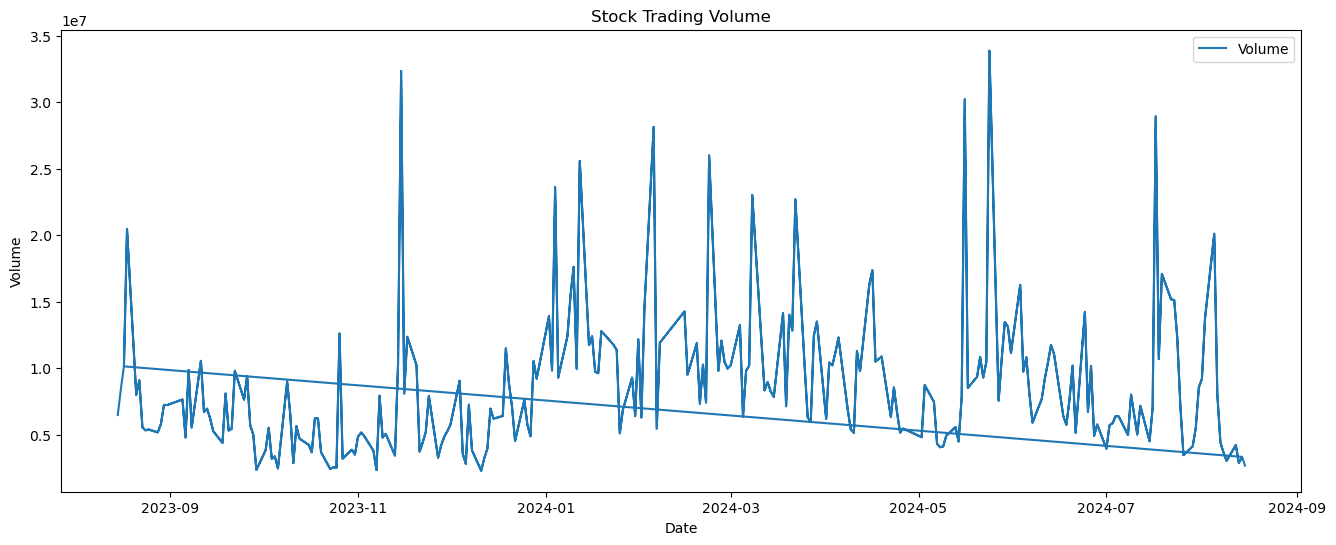

In [36]:
plt.figure(figsize=(16,6))
plt.plot(df['close'], label='Close Price')
plt.title('Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(16,6))
plt.plot(df['volume'], label='Volume')
plt.title('Stock Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


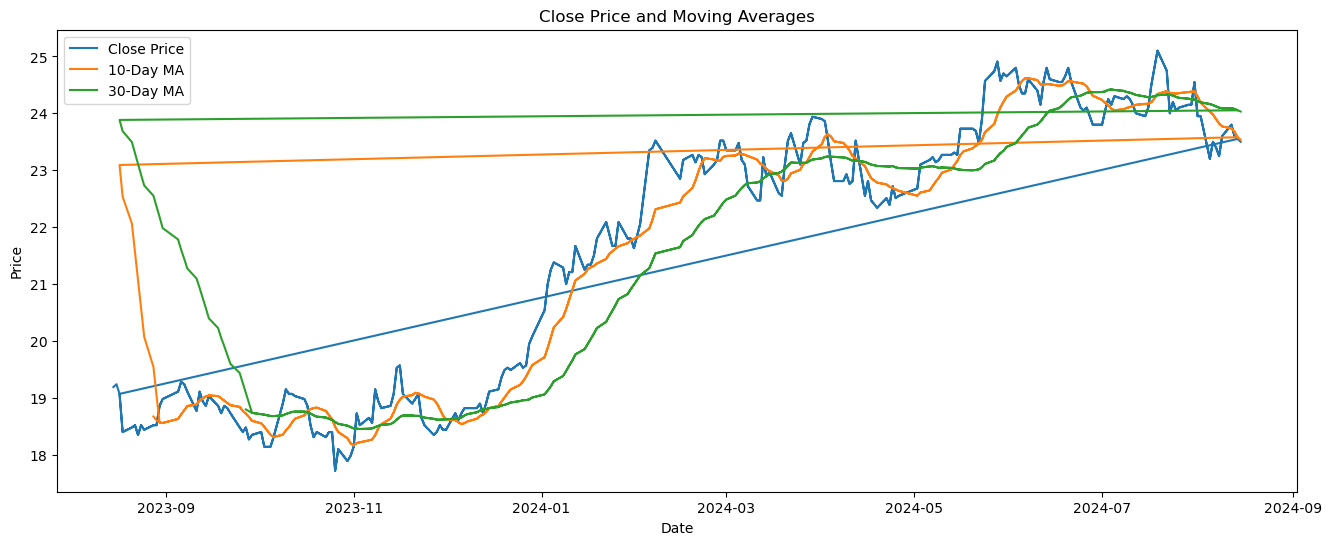

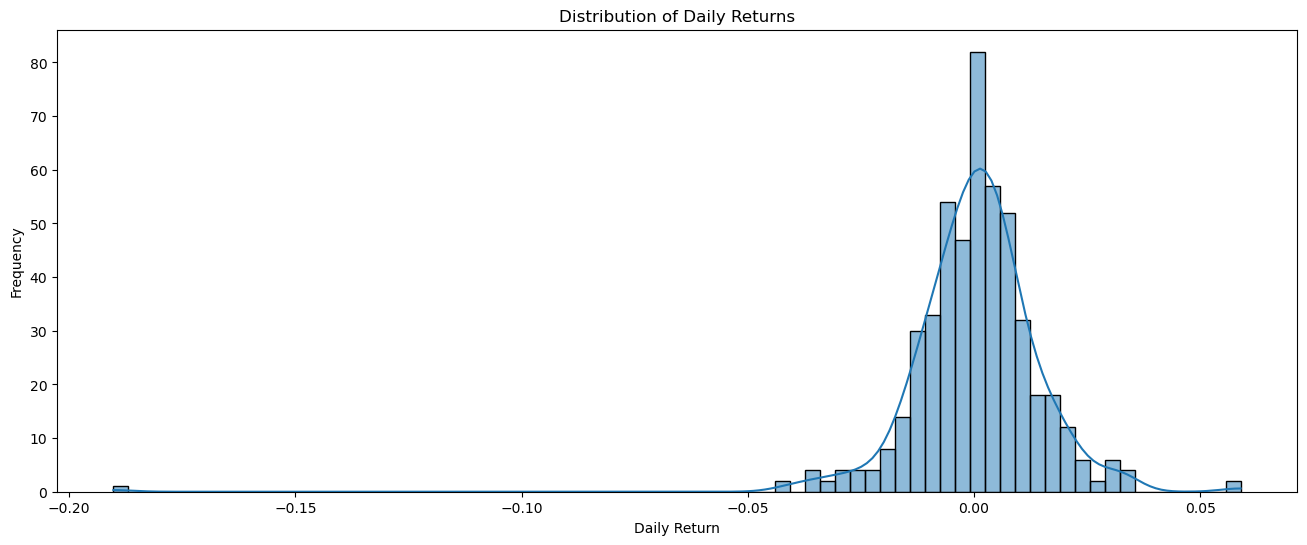

In [38]:
df['10-day MA'] = df['close'].rolling(window=10).mean()
df['30-day MA'] = df['close'].rolling(window=30).mean()

plt.figure(figsize=(16,6))
plt.plot(df['close'], label='Close Price')
plt.plot(df['10-day MA'], label='10-Day MA')
plt.plot(df['30-day MA'], label='30-Day MA')
plt.title('Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

df['Daily Return'] = df['close'].pct_change()
plt.figure(figsize=(16,6))
sns.histplot(df['Daily Return'].dropna(), kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


In [42]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [46]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['close']])
training_data_len = int(np.ceil(0.8 * len(scaled_data)))
train_data = scaled_data[:training_data_len]
test_data = scaled_data[training_data_len:]
# Tạo các tập dữ liệu huấn luyện và kiểm tra
def create_dataset(data, time_step=60):
    x, y = [], []
    for i in range(time_step, len(data)):
        x.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

x_train, y_train = create_dataset(train_data)
x_test, y_test = create_dataset(test_data)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [48]:
#LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=10)

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Epoch 1/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0252
Epoch 2/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0066
Epoch 3/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0039
Epoch 4/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0078
Epoch 5/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0026
Epoch 6/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0033
Epoch 7/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0031
Epoch 8/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0029
Epoch 9/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0108
Epoch 10/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0023


In [51]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f'RMSE: {rmse}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 276ms/step
RMSE: 0.7113953545658499



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

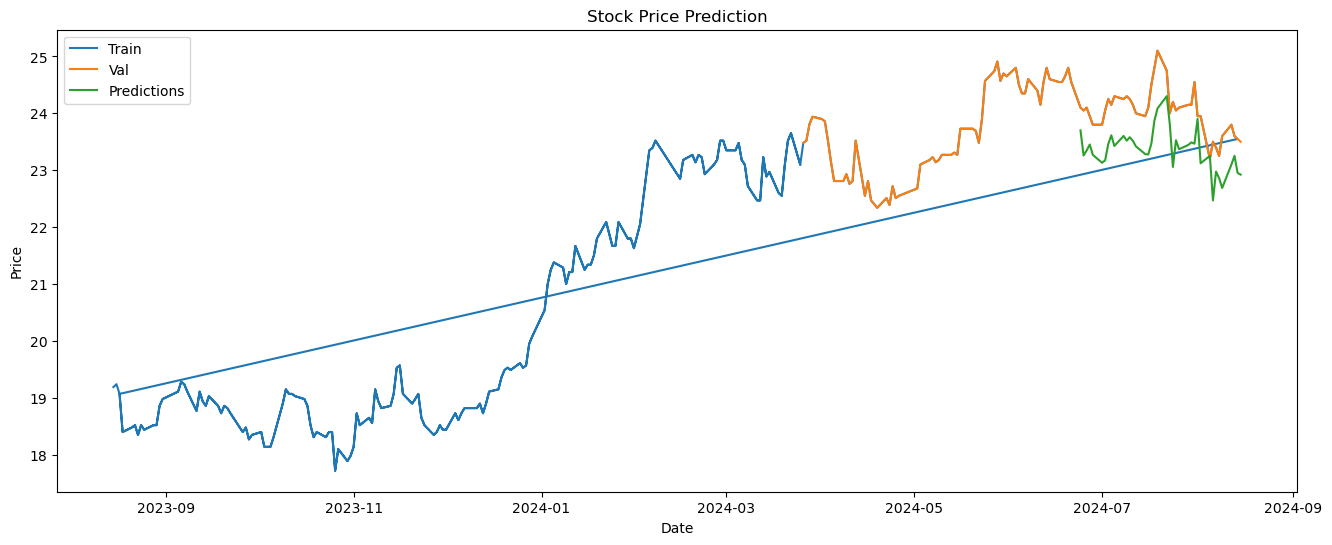

In [55]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = np.nan
valid['Predictions'].iloc[60:] = predictions.flatten()

plt.figure(figsize=(16,6))
plt.plot(train['close'], label='Train')
plt.plot(valid['close'], label='Val')
plt.plot(valid['Predictions'], label='Predictions')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Mean Squared Error: 0.01820716862052967


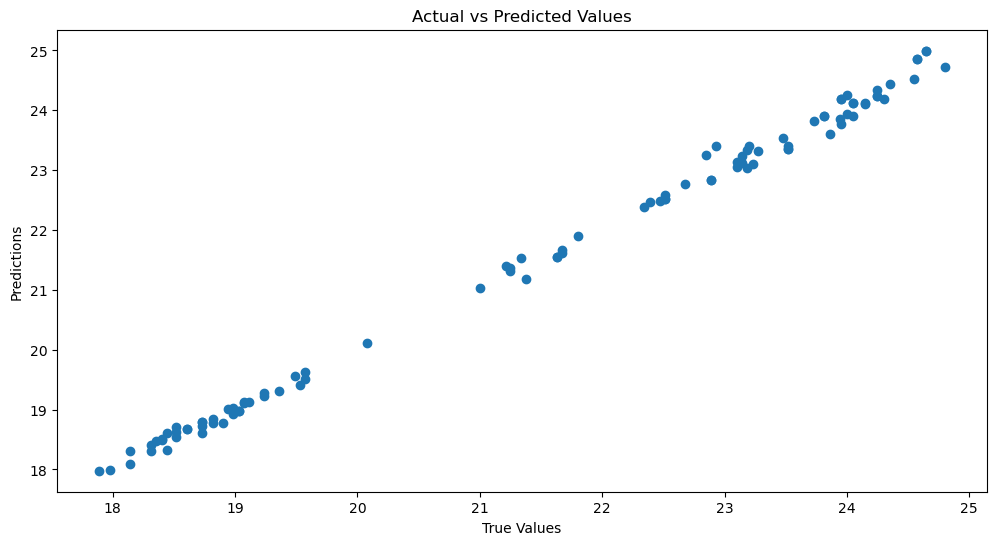

In [105]:
#Linear Regression
!pip install --upgrade statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load and preprocess data
df = pd.read_excel(r"Downloads/datafinace.xlsx")
df = pd.DataFrame(df)
df = df.drop(columns=['Unnamed: 0'])
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Xác định các thuộc tính đầu vào và biến mục tiêu
X = df[['open', 'high', 'low', 'volume']]
y = df['close']

# Chia dữ liệu thành dữ liệu huấn luyện và dữ liệu kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Xây dựng mô hình hồi quy
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Tính toán sai số trung bình bình phương (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Trực quan hóa
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Actual vs Predicted Values')
plt.show()


Epoch 1/200


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.2073 - val_loss: 0.1189
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0399 - val_loss: 0.0158
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0478 - val_loss: 0.0046
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0234 - val_loss: 0.0288
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0195 - val_loss: 0.0074
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0119 - val_loss: 0.0032
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0109 - val_loss: 0.0029
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0097 - val_loss: 0.0026
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0069 - val_loss: 0.0040
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0087 - val_loss: 0.0029
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0069 - val_loss: 0.0025
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0068 - val_loss: 0.0023


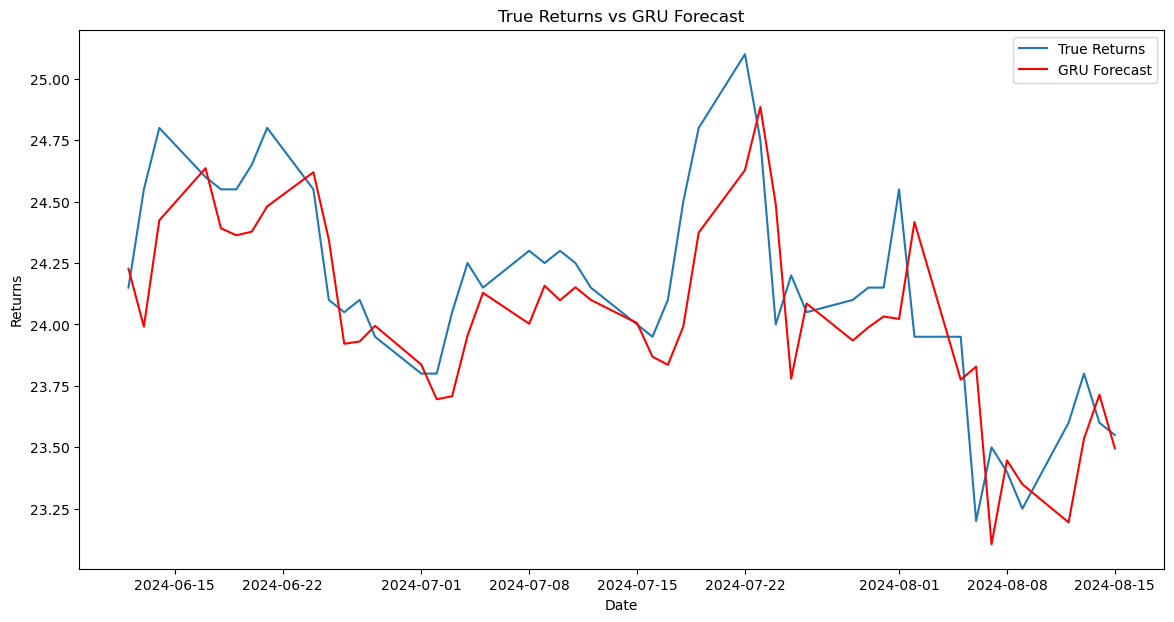

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
import tensorflow as tf

# Tải và tiền xử lý dữ liệu
df = pd.read_excel(r"Downloads/datafinace.xlsx")
df = df.drop(columns=['Unnamed: 0'])
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df = df[~df.index.duplicated(keep='first')]  # Xử lý nhãn trùng lặp

# Tính toán lợi nhuận
df['return'] = df['close'].pct_change()
df.dropna(inplace=True)  # Xóa các giá trị NA do tính toán lợi nhuận

# Chuyển đổi giá cổ phiếu và lợi nhuận thành định dạng phù hợp cho GRU
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['close']])

# Tạo dữ liệu cho mô hình GRU
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 15
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # reshape cho GRU

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Xây dựng mô hình GRU
model = Sequential()
model.add(GRU(32, return_sequences=True, input_shape=(time_step, 1)))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dropout(0.20))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=1)

# Dự đoán dữ liệu
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Chuyển đổi dự đoán về dạng gốc
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Đánh giá mô hình
rmse_train = np.sqrt(mean_squared_error(y_train_inv, train_predict))
mse_train = mean_squared_error(y_train_inv, train_predict)
mae_train = mean_absolute_error(y_train_inv, train_predict)
rmse_test = np.sqrt(mean_squared_error(y_test_inv, test_predict))
mse_test = mean_squared_error(y_test_inv, test_predict)
mae_test = mean_absolute_error(y_test_inv, test_predict)

print(f'Train data RMSE: {rmse_train}')
print(f'Train data MSE: {mse_train}')
print(f'Train data MAE: {mae_train}')
print(f'Test data RMSE: {rmse_test}')
print(f'Test data MSE: {mse_test}')
print(f'Test data MAE: {mae_test}')

print(f'Train data explained variance regression score: {explained_variance_score(y_train_inv, train_predict)}')
print(f'Test data explained variance regression score: {explained_variance_score(y_test_inv, test_predict)}')

print(f'Train data R2 score: {r2_score(y_train_inv, train_predict)}')
print(f'Test data R2 score: {r2_score(y_test_inv, test_predict)}')

# Trực quan hóa dự đoán
plt.figure(figsize=(14,7))
plt.plot(df.index[-len(y_test):], y_test_inv, label='True Returns')
plt.plot(df.index[-len(y_test):], test_predict, label='GRU Forecast', color='red')
plt.title('True Returns vs GRU Forecast')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


In [116]:
print(df.describe())

             open        high         low       close        volume  \
count  251.000000  251.000000  251.000000  251.000000  2.510000e+02   
mean    21.575020   21.758924   21.381912   21.566215  8.649339e+06   
std      2.365588    2.379190    2.325531    2.361784  5.271306e+06   
min     17.930000   18.100000   17.600000   17.720000  2.277359e+06   
25%     18.920000   19.110000   18.795000   18.940000  5.148344e+06   
50%     22.510000   22.680000   22.340000   22.470000  7.449978e+06   
75%     23.600000   23.850000   23.440000   23.600000  1.047546e+07   
max     25.100000   25.370000   24.650000   25.100000  3.386711e+07   

           return  
count  250.000000  
mean     0.000889  
std      0.012534  
min     -0.041241  
25%     -0.006253  
50%      0.000000  
75%      0.006907  
max      0.058957  


In [118]:
print(df['return'].describe())

count    250.000000
mean       0.000889
std        0.012534
min       -0.041241
25%       -0.006253
50%        0.000000
75%        0.006907
max        0.058957
Name: return, dtype: float64


In [137]:
print(df.columns)

Index(['open', 'high', 'low', 'close', 'volume', 'return'], dtype='object')
